## The SEAIRQ model

In the present notebook, we consider the stochastic version of the SEAIRQ model.

In the SEAIRQ model we consider, there are the following classes:

* **$S$** Susceptible
* **$E$** Exposed
* **$A$** Asymptomatic infected (this class is between $E$ and $I_a$, $I_s$, and models the time an individual is already infectious, but it is not clear yet whether the individual will remain asymptomatic)
* **$I_a$** Asymptomatic infected
* **$I_s$** Symptomatic infected
* **$R$** Recovered
* **$Q$** Quarantined

In the SEAIR model, once an individual is exposed, it undergoes the transitions

\begin{equation}
    E \rightarrow A \rightarrow I_x \rightarrow R,
\end{equation}

where $I_x$ is either $I_a$ or $I_s$.

In the SEAIRQ model, there is a finite rate from the states $S$, $E$, $A$, $I_a$, $I_s$ to a quarantined class $Q$, in which an individual does not contribute to any infection rates anymore.

# 0. Definition of the model

In [1]:
%%capture
## compile PyRoss for this notebook
import os
owd = os.getcwd()
os.chdir('../../')
%run setup.py install
os.chdir(owd)

In [2]:
%matplotlib inline
import numpy as np
import pyross
import matplotlib.pyplot as plt
#from matplotlib import rc; rc('text', usetex=True)

In [3]:
M = 1                  # the SIR model has no age structure
Ni = 10000*np.ones(M)   # so there is only one age group 
N = np.sum(Ni)         # and the total population is the size of this age group

alpha = 0              # fraction of asymptomatic infectives 
beta  = 0.2            # infection rate 

gE    = 1.             # progression rate from E to A
gAA   = 0.2            # rate to go from A to Ia
gAS   = 0.3            # rate to go from A to Is
gIa   = 0.1            # recovery rate of asymptomatic infectives 
gIs   = 0.1            # recovery rate of symptomatic infectives 
gE    = 0.04           # recovery rate of E
fsa   = 1              # the self-isolation parameter 

E0  = np.array([0])
A0  = np.array([1])
Ia0 = np.array([0])     # the SIR model has only one kind of infective 
Is0 = np.array([20])     # we take these to be symptomatic 
Q0  = np.array([0])
R0  = np.array([0])     # and assume there are no recovered individuals initially 
S0  = N-(Ia0+Is0+R0+E0)    # The initial susceptibles are obtained from S + E + A + Ia + Is + R = N

# there is no contact structure
def contactMatrix(t):   
    return np.identity(M) 

# duration of simulation and number of datapoints
Tf = 500;  Nt=Tf+1;  

# 1. SEAIR model

In [4]:
# For the SEAIR model, we set all rates to the Q-class to zero
tS    = 0.0            # rate S  -> Q
tE    = 0.00           # rate E  -> Q
tA    = 0.00           # rate A  -> Q
tIa   = 0.00           # rate Ia -> Q
tIs   = 0.00           # rate Is -> Q
#tIs   = 0.05           # rate Is -> Q

# instantiate model
parameters = {'alpha':alpha, 'beta':beta,
              'gE':gE,'gAA':gAA,'gAS':gAS,
              'gIa':gIa, 'gIs':gIs, 'gE':gE, 'fsa':fsa}
model = pyross.deterministic.SEAIR(parameters, M, Ni)

# simulate model
data=model.simulate(S0, E0, A0, Ia0, Is0, contactMatrix, Tf, Nt)

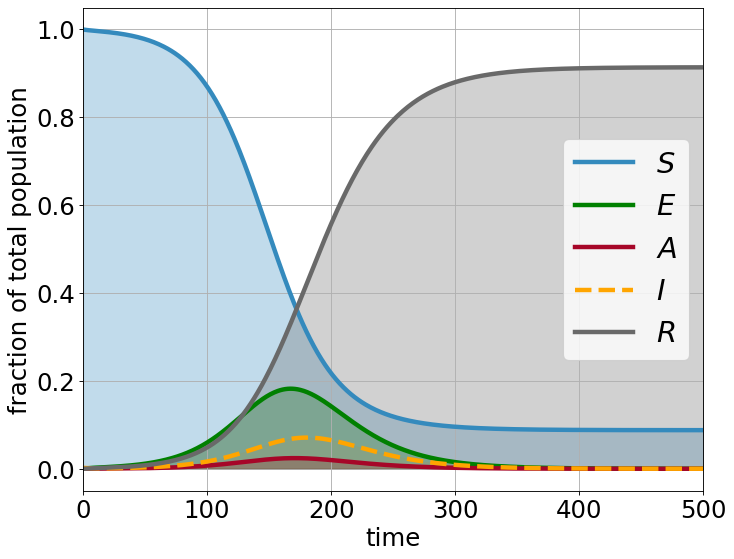

In [5]:
# plot the results of the simulation

S  = data['X'][:,0].flatten()
E  = data['X'][:,1].flatten()
A  = data['X'][:,2].flatten()
Ia = data['X'][:,3].flatten()
Is = data['X'][:,4].flatten()
t = data['t']


fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})


plt.fill_between(t, 0, S/N, color="#348ABD", alpha=0.3)
plt.plot(t, S/N, '-', color="#348ABD", label='$S$', lw=4)

plt.plot(t, E/N, '-', color="green", label='$E$', lw=4)
plt.fill_between(t, 0, E/N, color='green', alpha=0.3)

plt.fill_between(t, 0, A/N, color='#A60628', alpha=0.3)
plt.plot(t, A/N, '-', color='#A60628', label='$A$', lw=4)

plt.fill_between(t, 0, (Ia+Is)/N, color='orange', alpha=0.1)
plt.plot(t, (Ia+Is)/N, '-', color='orange', label='$I$', ls='--',lw=4)

R=N-S-E-A-Ia-Is; plt.fill_between(t, 0, R/N, color="dimgrey", alpha=0.3)
plt.plot(t, R/N, '-', color="dimgrey", label='$R$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.xlabel(r'time')
plt.ylabel(r'fraction of total population')
plt.autoscale(enable=True, axis='x', tight=True)

# 2. SEAIRQ model

We now set the rate at which symptomatic infectives get quarantined to $1/20$ days. All other classes stay as before, i.e. never get quarantined.

(Technically, this is similar to changing the self-isolation parameter "fsa".)

In [6]:
# We now consider a nonzero rate Is -> Q
tS    = 0.0            # rate S  -> Q
tE    = 0.00           # rate E  -> Q
tA    = 0.00           # rate A  -> Q
tIa   = 0.00           # rate Ia -> Q
tIs   = 0.05           # rate Is -> Q

# instantiate model
parameters = {'alpha':alpha, 'beta':beta,
              'gE':gE,'gAA':gAA,'gAS':gAS,
              'gIa':gIa, 'gIs':gIs, 'gE':gE, 'fsa':fsa,
             'tS':tS,'tE':tE,'tA':tA,'tIa':tIa,'tIs':tIs}
model = pyross.deterministic.SEAIRQ(parameters, M, Ni)

# simulate model
data=model.simulate(S0, E0, A0, Ia0, Is0, Q0, contactMatrix, Tf, Nt)

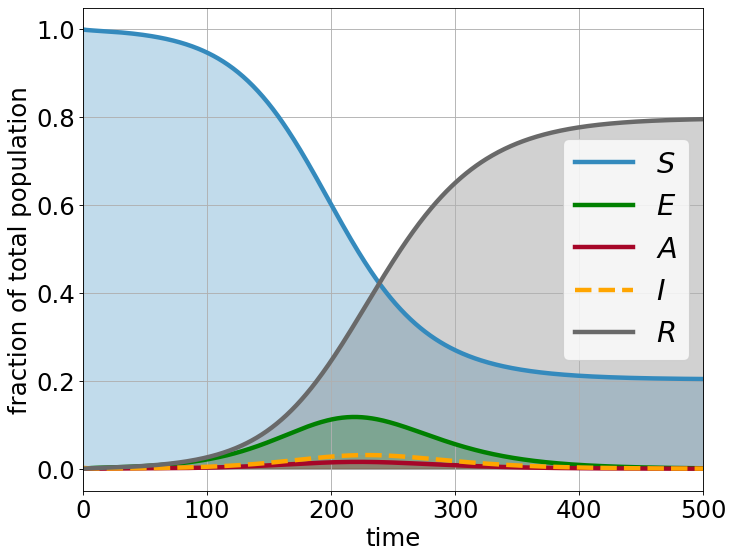

In [7]:
# plot the results of the simulation

S  = data['X'][:,0].flatten()
E  = data['X'][:,1].flatten()
A  = data['X'][:,2].flatten()
Ia = data['X'][:,3].flatten()
Is = data['X'][:,4].flatten()
Q  = data['X'][:,5].flatten()
t = data['t']


fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})


plt.fill_between(t, 0, S/N, color="#348ABD", alpha=0.3)
plt.plot(t, S/N, '-', color="#348ABD", label='$S$', lw=4)

plt.plot(t, E/N, '-', color="green", label='$E$', lw=4)
plt.fill_between(t, 0, E/N, color='green', alpha=0.3)

plt.fill_between(t, 0, A/N, color='#A60628', alpha=0.3)
plt.plot(t, A/N, '-', color='#A60628', label='$A$', lw=4)

plt.fill_between(t, 0, (Ia+Is)/N, color='orange', alpha=0.1)
plt.plot(t, (Ia+Is)/N, '-', color='orange', label='$I$', ls='--',lw=4)

R=N-S-E-A-Ia-Is; plt.fill_between(t, 0, R/N, color="dimgrey", alpha=0.3)
plt.plot(t, R/N, '-', color="dimgrey", label='$R$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.xlabel(r'time')
plt.ylabel(r'fraction of total population')
plt.autoscale(enable=True, axis='x', tight=True)

# 3. SEAIRQ model with more nonzero rates to quarantine class

We now set the rate at which symptomatic infectives get quarantined to $1/20$ days, and the rates at which the $E$, $A$, $I_a$, $I_s$ get quarantined to $1/50$ days.

In [8]:
# For the SEAIR model, we set all rates to the Q-state to zero
tS    = 0.0            # rate S  -> Q
tE    = 0.02           # rate E  -> Q
tA    = 0.02           # rate A  -> Q
tIa   = 0.02           # rate Ia -> Q
tIs   = 0.05           # rate Is -> Q

# instantiate model
parameters = {'alpha':alpha, 'beta':beta,
              'gE':gE,'gAA':gAA,'gAS':gAS,
              'gIa':gIa, 'gIs':gIs, 'gE':gE, 'fsa':fsa,
             'tS':tS,'tE':tE,'tA':tA,'tIa':tIa,'tIs':tIs}
model = pyross.deterministic.SEAIRQ(parameters, M, Ni)

# simulate model
data=model.simulate(S0, E0, A0, Ia0, Is0, Q0, contactMatrix, Tf, Nt)

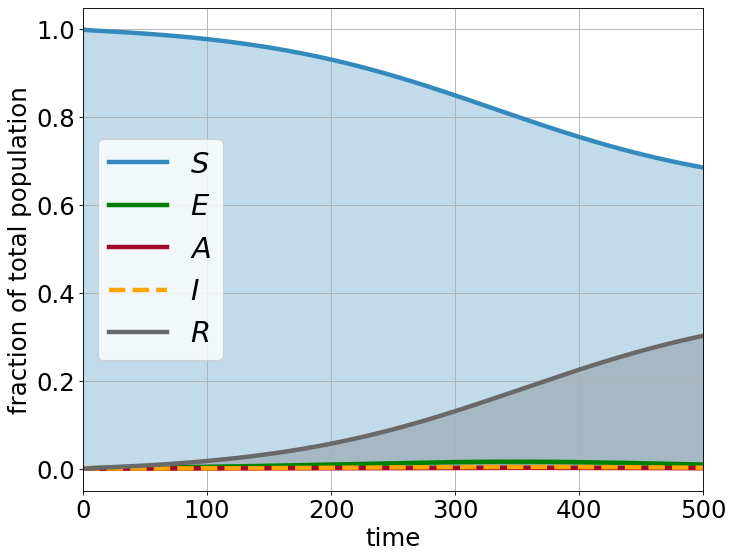

In [9]:
# plot the results of the simulation

S  = data['X'][:,0].flatten()
E  = data['X'][:,1].flatten()
A  = data['X'][:,2].flatten()
Ia = data['X'][:,3].flatten()
Is = data['X'][:,4].flatten()
Q  = data['X'][:,5].flatten()
t = data['t']


fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})


plt.fill_between(t, 0, S/N, color="#348ABD", alpha=0.3)
plt.plot(t, S/N, '-', color="#348ABD", label='$S$', lw=4)

plt.plot(t, E/N, '-', color="green", label='$E$', lw=4)
plt.fill_between(t, 0, E/N, color='green', alpha=0.3)

plt.fill_between(t, 0, A/N, color='#A60628', alpha=0.3)
plt.plot(t, A/N, '-', color='#A60628', label='$A$', lw=4)

plt.fill_between(t, 0, (Ia+Is)/N, color='orange', alpha=0.1)
plt.plot(t, (Ia+Is)/N, '-', color='orange', label='$I$', ls='--',lw=4)

R=N-S-E-A-Ia-Is; plt.fill_between(t, 0, R/N, color="dimgrey", alpha=0.3)
plt.plot(t, R/N, '-', color="dimgrey", label='$R$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.xlabel(r'time')
plt.ylabel(r'fraction of total population')
plt.autoscale(enable=True, axis='x', tight=True)

We now observe qualitatively different behaviour as compared to 1 and 2. There is no clear peak in the number of exposed anymore, and the number of susceptibles decreases slowly. The processes has not reached a steady state yet, even after 500 days.

We now replot only the $E$, $A$, and $I = I_a + I_s$ classes, which are hardly visible in the above plot:

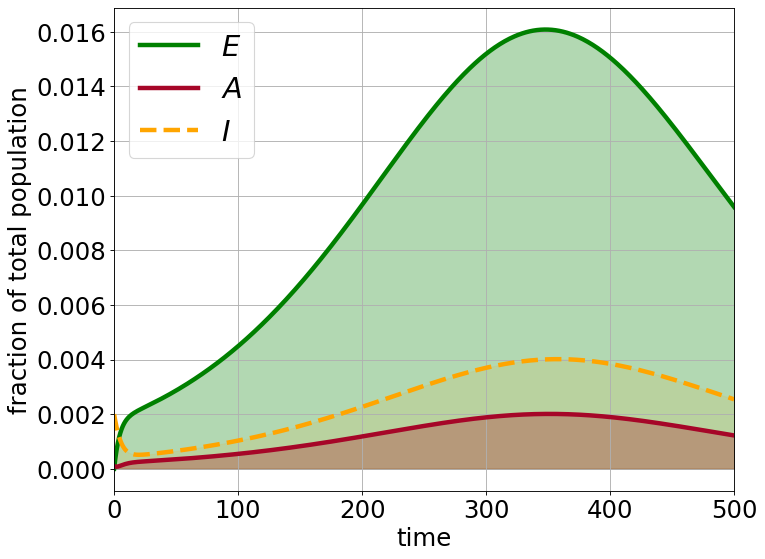

In [10]:
# plot only the E, A, and I = Ia + Is classes

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})


#plt.fill_between(t, 0, S/N, color="#348ABD", alpha=0.3)
#plt.plot(t, S/N, '-', color="#348ABD", label='$S$', lw=4)

plt.plot(t, E/N, '-', color="green", label='$E$', lw=4)
plt.fill_between(t, 0, E/N, color='green', alpha=0.3)

plt.fill_between(t, 0, A/N, color='#A60628', alpha=0.3)
plt.plot(t, A/N, '-', color='#A60628', label='$A$', lw=4)

plt.fill_between(t, 0, (Ia+Is)/N, color='orange', alpha=0.1)
plt.plot(t, (Ia+Is)/N, '-', color='orange', label='$I$', ls='--',lw=4)

#R=N-S-E-A-Ia-Is; plt.fill_between(t, 0, R/N, color="dimgrey", alpha=0.3)
#plt.plot(t, R/N, '-', color="dimgrey", label='$R$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.xlabel(r'time')
plt.ylabel(r'fraction of total population')
plt.autoscale(enable=True, axis='x', tight=True)

As can be seen, the peak now is at about 350 days, and after 500 days the average numbers in all classes are decreasing.